In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from bokeh import *
from bokeh.io import output_notebook,show,output_file
from bokeh.plotting import figure,save
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.transform import jitter
from bokeh.models.tools import *
from bokeh.models.widgets import *
from bokeh.layouts import row
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.plotting import figure, output_file, show,output_notebook
from bokeh.models import CustomJS, ColumnDataSource, Row
from bokeh.layouts import column
from bokeh.plotting import figure, show, curdoc
from bokeh.models.widgets import Button
from ipywidgets import interact
from bokeh.io import export_png
output_notebook()

Loading BokehJS ...

In [4]:
ngc188df =pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188.csv')
ngc188df = ngc188df.replace(r'^\s+$', np.nan, regex=True)
ngc188df

,_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,...,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E(BP-RP),Rad,Lum
0,0.0602,12.098011,85.254408,12.098330,0.0269,85.254431,0.0209,5.739430e+17,0.9016,0.0261,...,14.7465,0.0019,0.9958,NaN,NaN,5337,0.2987,0.146,0.98,0.708
1,0.1263,12.083999,85.254391,12.083950,0.4641,85.254399,0.3079,5.739430e+17,0.3235,0.4234,...,19.026,0.051,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1922,12.147064,85.254755,12.146945,0.0506,85.254751,0.0371,5.739400e+17,0.4475,0.0478,...,15.7668,0.0028,0.958,NaN,NaN,5433,NaN,NaN,1.2,1.133
3,0.2149,12.091534,85.251715,12.091228,0.6613,85.251711,0.3883,5.739430e+17,0.2086,0.5639,...,19.0843,0.0441,1.5751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2408,12.121986,85.251149,12.121986,1.8972,85.251149,2.8670,5.739430e+17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,10.0147,10.678543,85.374233,10.678460,0.0604,85.374251,0.0527,5.739440e+17,0.4918,0.0628,...,16.3913,0.0062,1.105,NaN,NaN,5002.81,0.4797,0.2112,0.97,0.530
1483,10.1143,13.600250,85.371458,13.600132,0.0699,85.371454,0.0578,5.739650e+17,0.4832,0.0716,...,16.6961,0.0049,1.1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,10.2784,13.576317,85.377406,13.576212,0.0763,85.377402,0.0634,5.739650e+17,0.5676,0.0791,...,16.7928,0.007,1.2507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1485,10.3786,13.618400,85.376312,13.618373,0.0865,85.376313,0.0706,5.739650e+17,0.3235,0.0887,...,16.9964,0.0057,1.0357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


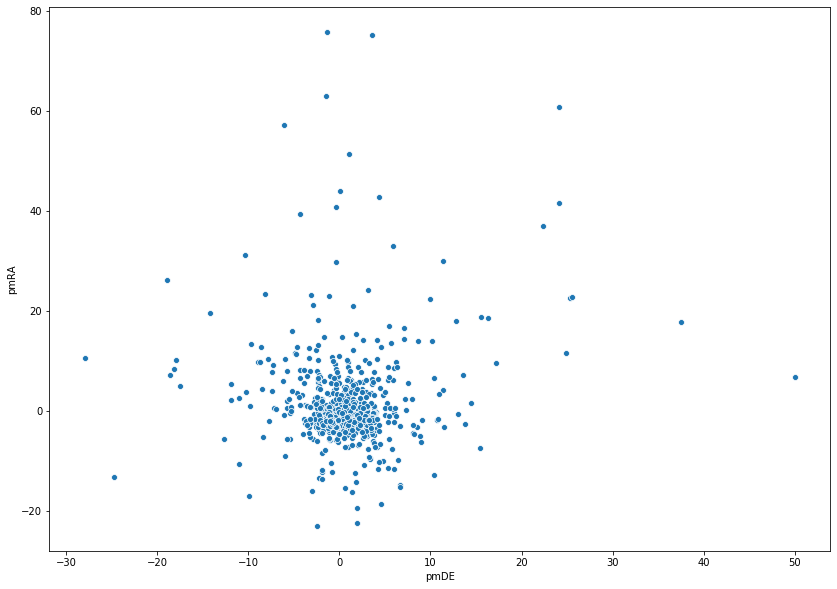

In [5]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=ngc188df['pmDE'].astype('float'),y=ngc188df['pmRA'].astype('float'))
# plt.ylim(-1.5,-3.5)
# plt.xlim(-10,0)
plt.show()

In [6]:
def modify_doc(doc):
    select_tools = ['lasso_select', 'tap', 'reset','box_zoom',
                'wheel_zoom','pan','undo']
    
    ngc188pm = ColumnDataSource(data=dict(x=ngc188df['pmDE'].astype('float'),y=ngc188df['pmRA'].astype('float')))
    ngc188pmp = figure(plot_width = 800, plot_height = 600,x_range = (-8, -3), y_range = (-1.5, -3.5), tools = select_tools, title = "ngc188 Proper Motion")
    ngc188pmp.circle('x', 'y', source = ngc188pm,selection_color="firebrick", nonselection_fill_alpha=0.4,nonselection_color="blue",alpha = 0.6,size=4)
    ngc188pmp.xaxis.axis_label = "pmDE"
    ngc188pmp.yaxis.axis_label = "pmRA"
    
    s2 = ColumnDataSource(data = dict(x = [], y = []))

    ngc188pm.selected.js_on_change('indices', CustomJS(args=dict(ngc188pm=ngc188pm, s2=s2), code="""
        var inds = cb_obj.indices;
        var d1 = ngc188pm.data;
        d2 = {'x': [], 'y': []}
        for (var i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        }
        s2.data = d2  """))
    
    def get_values():
        print(s2.data)
    
    def to_dataf():
        global df
        df = s2.to_df()
        print(df)
        return df
    
    #export_png(ngc188pmp, filename="plot.png")
    
    button2= Button(label= "Convert to DataFrame")
    button2.on_click(to_dataf)
    
    doc.add_root(column(Row(ngc188pmp),button2))


In [7]:
show(modify_doc,notebook_url="http://localhost:8888")

         x      y
0   -0.932 -2.295
1   -0.928 -2.063
2   -0.894 -2.198
3   -0.986 -2.445
4   -1.050 -2.384
..     ...    ...
406 -0.858 -1.990
407 -1.122 -2.370
408 -0.999 -2.289
409 -0.837 -2.213
410 -1.022 -1.948

[411 rows x 2 columns]


In [8]:
outputdata = df

ngc188df["bool"] = (df["y"].isin(ngc188df["pmRA"]) & df["x"].isin(ngc188df["pmDE"])) | (ngc188df["pmRA"].isnull() | ngc188df["pmDE"].isnull())

selecteddf = ngc188df[ngc188df['bool'] == True]
selecteddf

,_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,...,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E(BP-RP),Rad,Lum,bool
0,0.0602,12.098011,85.254408,12.098330,0.0269,85.254431,0.0209,5.739430e+17,0.9016,0.0261,...,0.0019,0.9958,NaN,NaN,5337,0.2987,0.146,0.98,0.708,True
1,0.1263,12.083999,85.254391,12.083950,0.4641,85.254399,0.3079,5.739430e+17,0.3235,0.4234,...,0.051,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,0.1922,12.147064,85.254755,12.146945,0.0506,85.254751,0.0371,5.739400e+17,0.4475,0.0478,...,0.0028,0.958,NaN,NaN,5433,NaN,NaN,1.2,1.133,True
3,0.2149,12.091534,85.251715,12.091228,0.6613,85.251711,0.3883,5.739430e+17,0.2086,0.5639,...,0.0441,1.5751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,0.2408,12.121986,85.251149,12.121986,1.8972,85.251149,2.8670,5.739430e+17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3.6160,11.872869,85.312074,11.872749,0.0767,85.312069,0.0605,5.739430e+17,0.3623,0.0791,...,0.0066,1.4551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
407,3.6286,12.785782,85.278101,12.785657,0.0494,85.278096,0.0376,5.739400e+17,0.4496,0.0479,...,0.0032,1.2027,NaN,NaN,4894.37,1.2697,0.6313,1.47,1.123,True
408,3.6305,11.675414,85.303904,11.675299,0.0605,85.303902,0.0507,5.739430e+17,0.642,0.0663,...,0.0046,1.0936,NaN,NaN,5037,0.0683,0.034,0.79,0.364,True
409,3.6363,12.436168,85.200878,12.436040,0.0315,85.200874,0.0263,5.739380e+17,0.5425,0.031,...,0.0021,0.8737,NaN,NaN,5843,0.4157,0.2118,1.23,1.576,True


/Users/Isaac/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Isaac/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


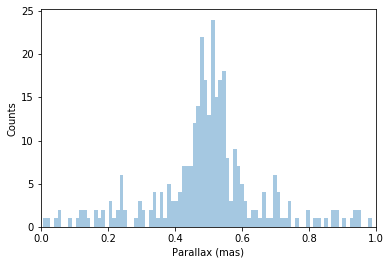

In [9]:
plot = sns.distplot(selecteddf['Plx'].astype('float'),bins=1000,kde=False)
plt.xlim(0,1)
plt.xlabel("Parallax (mas)")
plt.ylabel("Counts")
plt.show()
fig = plot.get_figure()
#fig.savefig("parallax.jpeg") #plx = .35

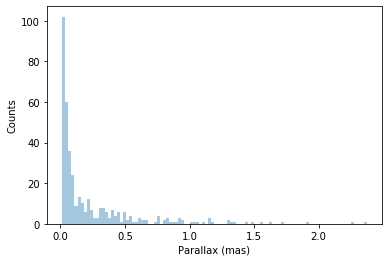

In [10]:
plot = sns.distplot(selecteddf['e_Plx'].astype('float'),bins=100,kde=False)
#plt.xlim(0,0.75)
plt.xlabel("Parallax (mas)")
plt.ylabel("Counts")
plt.show()
fig = plot.get_figure()
#fig.savefig("parallax.jpeg") #plx = .35

In [11]:
plxcorr = selecteddf.loc[(selecteddf['Plx'].astype('float') > 0) & (selecteddf['Plx'].astype('float') < 1)]

In [12]:
plxcorr

,_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,...,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E(BP-RP),Rad,Lum,bool
0,0.0602,12.098011,85.254408,12.098330,0.0269,85.254431,0.0209,5.739430e+17,0.9016,0.0261,...,0.0019,0.9958,NaN,NaN,5337,0.2987,0.146,0.98,0.708,True
1,0.1263,12.083999,85.254391,12.083950,0.4641,85.254399,0.3079,5.739430e+17,0.3235,0.4234,...,0.051,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,0.1922,12.147064,85.254755,12.146945,0.0506,85.254751,0.0371,5.739400e+17,0.4475,0.0478,...,0.0028,0.958,NaN,NaN,5433,NaN,NaN,1.2,1.133,True
3,0.2149,12.091534,85.251715,12.091228,0.6613,85.251711,0.3883,5.739430e+17,0.2086,0.5639,...,0.0441,1.5751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
6,0.3602,12.128547,85.260773,12.128440,0.0216,85.260769,0.0170,5.739430e+17,0.5448,0.0212,...,0.0017,0.9036,NaN,NaN,5458,NaN,NaN,1.99,3.160,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3.6160,11.872869,85.312074,11.872749,0.0767,85.312069,0.0605,5.739430e+17,0.3623,0.0791,...,0.0066,1.4551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
407,3.6286,12.785782,85.278101,12.785657,0.0494,85.278096,0.0376,5.739400e+17,0.4496,0.0479,...,0.0032,1.2027,NaN,NaN,4894.37,1.2697,0.6313,1.47,1.123,True
408,3.6305,11.675414,85.303904,11.675299,0.0605,85.303902,0.0507,5.739430e+17,0.642,0.0663,...,0.0046,1.0936,NaN,NaN,5037,0.0683,0.034,0.79,0.364,True
409,3.6363,12.436168,85.200878,12.436040,0.0315,85.200874,0.0263,5.739380e+17,0.5425,0.031,...,0.0021,0.8737,NaN,NaN,5843,0.4157,0.2118,1.23,1.576,True


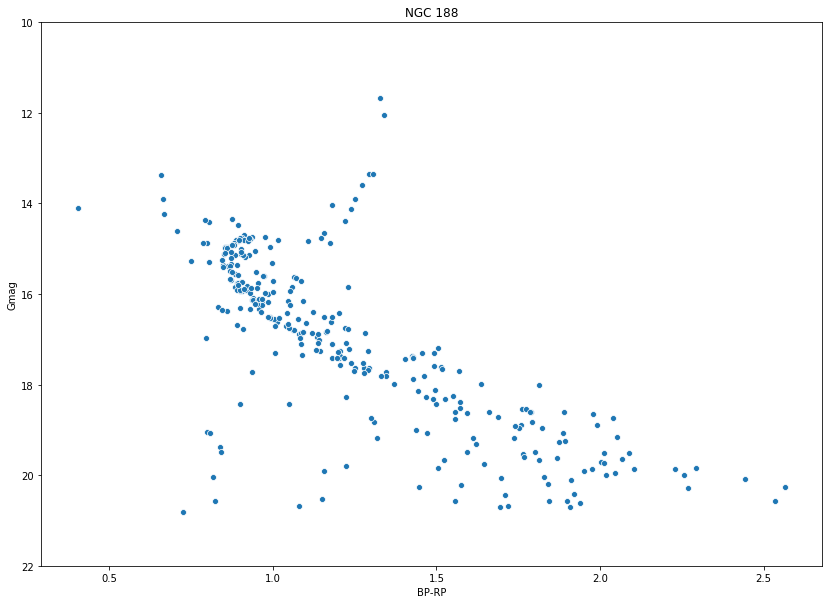

In [13]:
plt.figure(figsize=(14,10))
plot = sns.scatterplot(x=plxcorr['BP-RP'].astype('float'),y=plxcorr['Gmag'].astype('float'))
plt.ylim(22,10)
plt.title("NGC 188")
plt.show()
fig = plot.get_figure()
#fig.savefig('ngc6475.jpg')

In [14]:
def modify_doc(doc):
    select_tools = ['lasso_select', 'tap', 'reset','box_zoom',
                'wheel_zoom','pan','undo']
    
    ngc188corr = ColumnDataSource(data=dict(x=plxcorr['BP-RP'].astype('float'),y=plxcorr['Gmag'].astype('float')))
    ngc188corrp = figure(plot_width = 800, plot_height = 600,x_range = (0.65,2), y_range = (22,10), tools = select_tools, title = "ngc188")
    ngc188corrp.circle('x', 'y', source = ngc188corr,selection_color="firebrick", nonselection_fill_alpha=0.4,nonselection_color="blue",alpha = 0.6,size=4)
    ngc188corrp.xaxis.axis_label = "pmDE"
    ngc188corrp.yaxis.axis_label = "pmRA"
    
    s2 = ColumnDataSource(data = dict(x = [], y = []))

    ngc188corr.selected.js_on_change('indices', CustomJS(args=dict(ngc188corr=ngc188corr, s2=s2), code="""
        var inds = cb_obj.indices;
        var d1 = ngc188corr.data;
        d2 = {'x': [], 'y': []}
        for (var i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        }
        s2.data = d2  """))
    
    def get_values():
        print(s2.data)
    
    def to_dataf():
        global df
        df = s2.to_df()
        print(df)
        return df
    
    #export_png(ngc188corrp, filename="plot.png")
    
    button2= Button(label= "Convert to DataFrame")
    button2.on_click(to_dataf)
    
    doc.add_root(column(Row(ngc188corrp),button2))


In [15]:
show(modify_doc,notebook_url="http://localhost:8888")

In [16]:
outputdata = df

plxcorr2 = plxcorr.copy()

plxcorr2["bool"] = (df["y"].isin(plxcorr2["Gmag"]) & df["x"].isin(plxcorr2["BP-RP"])) | (plxcorr2["BP-RP"].isnull() | plxcorr2["Gmag"].isnull())

selecteddf2 = plxcorr2[plxcorr2['bool'] == True]

Mode of Extinction in G Mag: 0.506


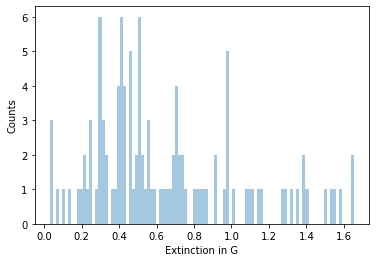

In [17]:
#Extinction in Gmag
sns.distplot(plxcorr['AG'].astype('float64'),bins=100,kde=False)
plt.xlabel("Extinction in G")
plt.ylabel("Counts")
print("Mode of Extinction in G Mag:",plxcorr['AG'].astype('float64').mode()[0])

Reddening Mode: 0.0145


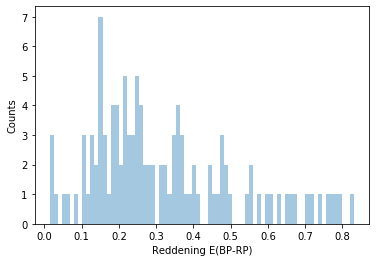

In [18]:
# Reddening
sns.distplot(plxcorr['E(BP-RP)'].astype('float64'),bins=75,kde=False)
plt.xlabel("Reddening E(BP-RP)")
plt.ylabel("Counts")
print("Reddening Mode:",plxcorr['E(BP-RP)'].astype('float64').mode()[0])

In [20]:
iso1 = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188iso1.csv')
iso2 = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188iso2.csv')
iso3 = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188iso3.txt',sep='\s+')
iso4 = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188iso4.txt',sep='\s+')
iso5 = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188iso5.txt',sep='\s+')
iso6 = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188iso6.txt',sep='\s+')

In [21]:
# Using padova isochrones
E = 0.082 # using webda extinction
d = 11.0

iso1['AG'] = plxcorr['AG'].astype('float64').mode()[0]
iso1['G_fix43'] = iso1['Gmag'] + iso1['AG']
iso1['G_final43'] = iso1['G_fix43'] + d

iso2['AG'] = plxcorr['AG'].astype('float64').mode()[0]
iso2['G_fix45'] = iso2['Gmag'] + iso2['AG']
iso2['G_final45'] = iso2['G_fix45'] + d

iso3['AG'] = plxcorr['AG'].astype('float64').mode()[0]
iso3['G_fix5'] = iso3['Gmag'] + iso3['AG']
iso3['G_final5'] = iso3['G_fix5'] + d

iso4['AG'] = plxcorr['AG'].astype('float64').mode()[0]
iso4['G_fix6'] = iso4['Gmag'] + iso4['AG']
iso4['G_final6'] = iso4['G_fix6'] + d

iso5['AG'] = plxcorr['AG'].astype('float64').mode()[0]
iso5['G_fix7'] = iso5['Gmag'] + iso5['AG']
iso5['G_final7'] = iso5['G_fix7'] + d

iso6['AG'] = plxcorr['AG'].astype('float64').mode()[0]
iso6['G_fix8'] = iso6['Gmag'] + iso6['AG']
iso6['G_final8'] = iso6['G_fix8'] + d

iso1['B-Rf'] = (iso1['G_BPftmag'] - iso1['G_RPmag']) + E
iso2['B-Rf'] = (iso2['G_BPftmag'] - iso2['G_RPmag']) + E
iso3['B-Rf'] = (iso3['G_BPftmag'] - iso3['G_RPmag']) + E
iso4['B-Rf'] = (iso4['G_BPftmag'] - iso4['G_RPmag']) + E
iso5['B-Rf'] = (iso5['G_BPftmag'] - iso5['G_RPmag']) + E
iso6['B-Rf'] = (iso6['G_BPftmag'] - iso6['G_RPmag']) + E


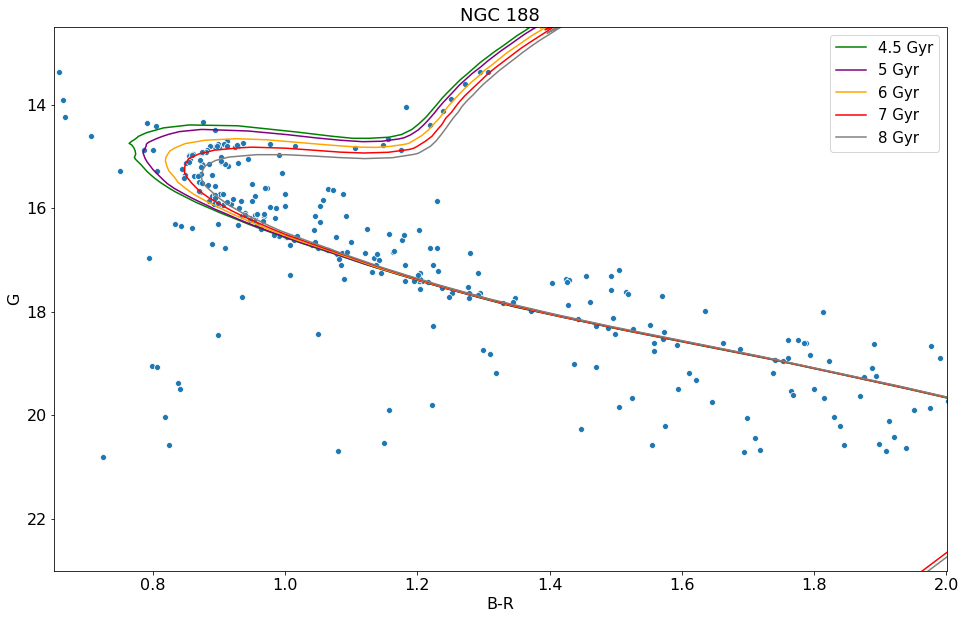

In [22]:
fig = plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.scatterplot(x=plxcorr['BP-RP'].astype('float'),y=plxcorr['Gmag'].astype('float'))
#sns.scatterplot(x=iso5['B-Rf'],y=iso5['G_final7'],hue=iso5['Mass'])

#plt.plot(iso1['B-Rf'],iso1['G_final43'],color='red', label='4.3 Gyr') #WEBDA Age
plt.plot(iso2['B-Rf'],iso2['G_final45'],color='green', label='4.5 Gyr')
plt.plot(iso3['B-Rf'],iso3['G_final5'],color='purple', label='5 Gyr')
plt.plot(iso4['B-Rf'],iso4['G_final6'],color='orange', label='6 Gyr')
plt.plot(iso5['B-Rf'],iso5['G_final7'],color='red', label='7 Gyr')
plt.plot(iso6['B-Rf'],iso6['G_final8'],color='grey', label='8 Gyr')


plt.xlim(0.65, 2)
plt.ylim(23, 12.5)
plt.title('NGC 188',fontsize=18)
plt.xlabel('B-R',fontsize=16)
plt.ylabel('G',fontsize=16)
plt.legend(prop={'size':15})
plt.show()
fig.savefig("ngc188.jpg",dpi=100)

In [23]:
avgplx = plxcorr.Plx.astype('float').mean()
1/avgplx * 10**3

2016.6166660604054

In [24]:
plusminus=u'\u00b1'
d = {'Distance Modulus': ['11.0'+plusminus+'0.1'],'Parallax Distance(pc)':['2007.9'+plusminus+'40'],'Photometry Distance(pc)': ['x'+plusminus+'x'],'Gaia Distance (pc)':['1585'+plusminus+'73'],
     'Photometry Age(Gyr)':['x'+plusminus+'x'],'Gaia Age (Gyr)':['7'+plusminus+'0.25']}
results = pd.DataFrame(data=d)
results.rename(index = {0: 'NGC 188'},inplace = True)
results

,Distance Modulus,Parallax Distance(pc),Photometry Distance(pc),Gaia Distance (pc),Photometry Age(Gyr),Gaia Age (Gyr)
NGC 188,11.0±0.1,2007.9±40,x±x,1585±73,x±x,7±0.25


In [41]:
isomass_list = isorange.Mass.tolist()
iso = isorange[['B-Rf','G_final7','Mass']]
iso

NameError: name 'isorange' is not defined

In [34]:
star = plxcorr[['BP-RP','Gmag']]
star

,BP-RP,Gmag
0,0.9958,15.3237
1,1.1573,19.9016
2,0.958,16.3220
3,1.5751,20.2109
6,0.9036,14.7784
...,...,...
406,1.4551,17.3093
407,1.2027,16.4233
408,1.0936,16.8397
409,0.8737,15.5093


In [39]:
from scipy.spatial.distance import cdist


df1 = iso.copy()

df2 = star.copy()


def closest_point(point, points):
    #Find closest point from a list of points.
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, col2):
    #Match value x from col1 row to value in col2.
    return df[df[col1] == x][col2].values[0]


# df1 = pd.DataFrame(data1)
# df2 = pd.DataFrame(data2)

df1['point'] = [(x, y) for x,y in zip(df1['B-Rf'], df1['G_final7'])]
df2['point'] = [(x, y) for x,y in zip(df2['BP-RP'], df2['Gmag'])]

df2['closest'] = [closest_point(x, list(df1['point'])) for x in df2['point']]
df2['mass'] = [match_value(df1, 'point', x, 'Mass') for x in df2['closest']]

df2

,BP-RP,Gmag,point,closest,mass
0,0.9958,15.3237,"(0.9958, 15.3237)","(nan, nan)",NaN
1,1.1573,19.9016,"(1.1573, 19.9016)","(nan, nan)",NaN
2,0.958,16.3220,"(0.958, 16.322)","(nan, nan)",NaN
3,1.5751,20.2109,"(1.5751, 20.2109)","(nan, nan)",NaN
6,0.9036,14.7784,"(0.9036, 14.7784)","(nan, nan)",NaN
...,...,...,...,...,...
406,1.4551,17.3093,"(1.4551, 17.3093)","(nan, nan)",NaN
407,1.2027,16.4233,"(1.2027, 16.4233)","(nan, nan)",NaN
408,1.0936,16.8397,"(1.0936, 16.8397)","(nan, nan)",NaN
409,0.8737,15.5093,"(0.8737, 15.5093)","(nan, nan)",NaN


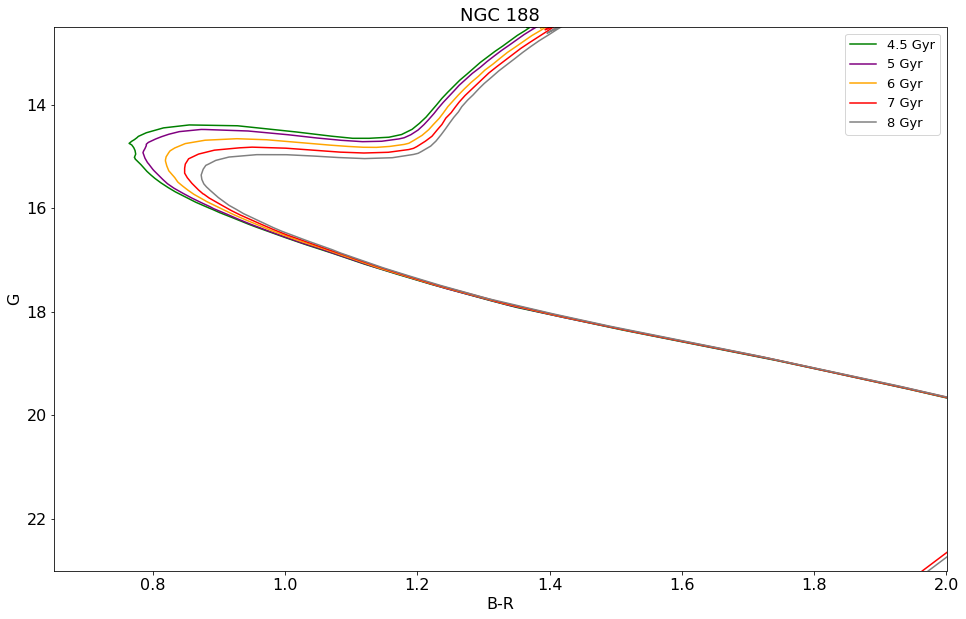

In [36]:


fig = plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


sns.scatterplot(x=df2['BP-RP'].astype('float'),y=df2['Gmag'].astype('float'),hue=df2['mass'].round(4),palette="winter_r")
#sns.scatterplot(x=plxcorr['BP-RP'].astype('float'),y=plxcorr['Gmag'].astype('float'))
#sns.scatterplot(x=iso5['B-Rf'],y=iso5['G_final7'],hue=iso5['Mass'])

#plt.plot(iso1['B-Rf'],iso1['G_final43'],color='red', label='4.3 Gyr') #WEBDA Age
plt.plot(iso2['B-Rf'],iso2['G_final45'],color='green', label='4.5 Gyr')
plt.plot(iso3['B-Rf'],iso3['G_final5'],color='purple', label='5 Gyr')
plt.plot(iso4['B-Rf'],iso4['G_final6'],color='orange', label='6 Gyr')
plt.plot(iso5['B-Rf'],iso5['G_final7'],color='red', label='7 Gyr')
plt.plot(iso6['B-Rf'],iso6['G_final8'],color='grey', label='8 Gyr')


plt.xlim(0.65, 2)
plt.ylim(23, 12.5)
plt.title('NGC 188',fontsize=18)
plt.xlabel('B-R',fontsize=16)
plt.ylabel('G',fontsize=16)
plt.legend(prop={'size':13})
plt.show()
#fig.savefig("ngc188mass.jpg",dpi=1000)

In [37]:
avgmass = df2.mass.mean()
clustermass = df2.mass.sum()

In [38]:
df2.mass.sum()

0.44999999999999996

In [1440]:
vr = pd.read_csv('/Users/Isaac/Astrophysics Techniques/ngc188vr.txt',sep='\s+')
coords = pd.read_fwf('/Users/Isaac/Astrophysics Techniques/webdacoords.txt')

In [1442]:
coords = coords[1:]

In [1443]:
coords

,No,Ref,RA(2000),Dec(2000)
1,1.0,338.0,00 42 03.343,+85 22 52.10
2,1.0,366.0,00 42 03.345,+85 22 52.09
3,2.0,338.0,00 43 17.899,+85 23 02.29
4,2.0,366.0,00 43 17.898,+85 23 02.23
5,3.0,338.0,00 44 20.366,+85 25 10.08
...,...,...,...,...
7907,3126.0,43.0,00 55 09.22,+85 08 14.9
7908,3127.0,43.0,00 55 10.94,+85 07 57.8
7909,3128.0,43.0,00 55 16.23,+85 10 47.2
7910,3129.0,43.0,00 55 09.41,+85 05 22.8


In [1444]:
vr

,No,Ref,Vr
0,1,607,-80.5
1,2,607,-42.5
2,3,607,-96.7
3,5,607,-38.4
4,6,607,-86.9
...,...,...,...
967,7817,607,-46.4
968,7819,607,-50.1
969,7906,607,-1.2
970,13399,607,-27.9


In [1445]:
merged = pd.merge(vr,coords,on='No')
merged

,No,Ref_x,Vr,Ref_y,RA(2000),Dec(2000)
0,1,607,-80.5,338.0,00 42 03.343,+85 22 52.10
1,1,607,-80.5,366.0,00 42 03.345,+85 22 52.09
2,2,607,-42.5,338.0,00 43 17.899,+85 23 02.29
3,2,607,-42.5,366.0,00 43 17.898,+85 23 02.23
4,3,607,-96.7,338.0,00 44 20.366,+85 25 10.08
...,...,...,...,...,...,...
2330,7809,607,-18.9,366.0,00 41 06.649,+85 42 41.64
2331,7811,607,9.1,366.0,00 38 28.919,+85 43 07.68
2332,7817,607,-46.4,366.0,00 33 48.922,+85 43 29.01
2333,7819,607,-50.1,366.0,00 32 27.476,+85 42 38.27


In [1532]:
from astropy import units as u
from astropy.coordinates import Angle
dec = Angle(merged['Dec(2000)'],unit=u.deg)
ra = Angle(merged['RA(2000)'],unit=u.hour)
merged['Dec'] = dec.to_string(unit=u.deg, decimal=True)
merged['RA'] = ra.to_string(unit=u.deg, decimal=True)

In [2155]:
# Getting rid of No duplicates
merged2 = merged[merged.duplicated(['No'])]

In [2156]:
merged2

,No,Ref_x,Vr,Ref_y,RA(2000),Dec(2000),Dec,RA
1,1,607,-80.5,366.0,00 42 03.345,+85 22 52.09,85.3811,10.5139
3,2,607,-42.5,366.0,00 43 17.898,+85 23 02.23,85.384,10.8246
5,3,607,-96.7,366.0,00 44 20.345,+85 25 10.02,85.4194,11.0848
10,10,607,-40.2,366.0,00 55 45.227,+85 12 20.90,85.2058,13.9384
13,16,607,-10.3,366.0,00 40 43.119,+85 10 37.55,85.1771,10.1797
...,...,...,...,...,...,...,...,...
2322,7805,607,-22.9,366.0,00 42 16.383,+85 44 32.18,85.7423,10.5683
2324,7806,607,-41.9,366.0,00 41 47.059,+85 44 49.70,85.7471,10.4461
2326,7807,607,-24.1,366.0,00 41 40.093,+85 45 57.83,85.7661,10.4171
2328,7808,607,4.2,366.0,00 41 30.923,+85 42 43.53,85.7121,10.3788


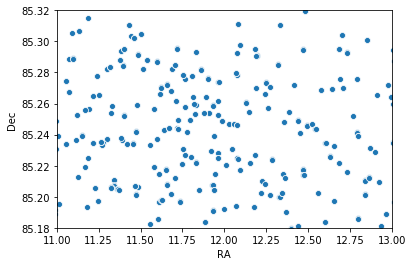

In [2222]:
sns.scatterplot(x=merged2['RA'].astype('float'),y=merged2['Dec'].astype('float'))
plt.xlim(11,13)
plt.ylim(85.18,85.32)
plt.show()

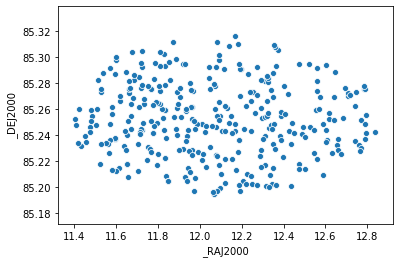

In [2219]:
sns.scatterplot(x=stars['_RAJ2000'].astype('float'),y=stars['_DEJ2000'].astype('float'))

In [2159]:
stars = stars.drop(['RA_ICRS','e_RA_ICRS','DE_ICRS','e_DE_ICRS','Teff','Rad','Lum','RV','e_RV'],axis=1)

In [2160]:
stars = pd.merge(plxcorr,df2,on='BP-RP')

In [5071]:
stars['_RAJ2000'] = stars['_RAJ2000'].round(4)
stars['_DEJ2000'] = stars['_DEJ2000'].round(4)

In [5072]:
# Start of trying to subtract RAs

In [5192]:
rasub = merged2.RA.astype('float').apply(lambda x : (x - stars._RAJ2000.astype('float'))*np.cos(np.radians(stars._DEJ2000.astype('float'))))



In [5193]:
decsub = merged2.Dec.astype('float').apply(lambda x : np.abs((x - stars._DEJ2000)))


In [5194]:
rval = np.sqrt(np.abs((rasub)**2 + (decsub)**2))


In [5195]:
rval

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360
0,0.182287,0.181456,0.184947,0.183844,0.179631,0.176664,0.188359,0.178243,0.190429,0.186964,0.185562,0.174476,0.181182,0.183780,0.184377,0.179951,0.191027,0.175954,0.177779,0.191956,0.194244,0.190647,0.195973,0.194977,0.168755,0.168755,0.179119,0.179119,0.168822,0.186845,0.182813,0.169463,0.168519,0.195186,0.183140,0.189931,0.177453,0.199225,0.171788,0.195609,0.181142,0.196040,0.194310,0.165444,0.169765,0.200607,0.200607,0.184650,0.184650,0.163385,0.182342,0.202631,0.202070,0.188109,0.164916,0.177558,0.178504,0.202265,0.203847,0.160126,0.160724,0.163461,0.163461,0.163461,0.163461,0.163461,0.178952,0.178952,0.178952,0.178952,0.178952,0.147323,0.147323,0.147323,0.147323,0.147323,0.171642,0.171642,0.171642,0.171642,0.171642,0.169758,0.169758,0.169758,0.169758,0.169758,0.200074,0.163643,0.198089,0.206025,0.164660,0.159639,0.181797,0.167465,0.206857,0.187299,0.162285,0.197032,0.200031,0.188307,0.163397,0.175565,0.156334,0.158715,0.169104,0.155241,0.157218,0.184217,0.210175,0.206998,0.170183,0.180794,0.156570,0.157646,0.155319,0.166845,0.210123,0.207595,0.194712,0.158882,0.212582,0.212752,0.191643,0.197325,0.194222,0.212258,0.203449,0.174174,0.174174,0.215534,0.215534,0.191402,0.199825,0.204199,0.151110,0.178153,0.176488,0.213025,0.191467,0.179482,0.165469,0.154696,0.197413,0.215779,0.149106,0.212556,0.186951,0.169522,0.208221,0.209959,0.155115,0.151363,0.170181,0.148282,0.169372,0.148474,0.177676,0.215519,0.170502,0.176894,0.218010,0.203298,0.171880,0.214185,0.159743,0.158726,0.165000,0.218087,0.164408,0.151384,0.144893,0.208050,0.208050,0.193208,0.193208,0.155893,0.155893,0.209938,0.209938,0.161169,0.210175,0.153757,0.148251,0.217253,0.166828,0.177415,0.182288,0.208746,0.144161,0.184092,0.142970,0.188912,0.169448,0.142751,0.222461,0.177932,0.186047,0.208153,0.217129,0.169508,0.166824,0.161864,0.143964,0.203725,0.222084,0.199624,0.146764,0.213598,0.216372,0.217546,0.141710,0.141444,0.222330,0.220828,0.144253,0.204851,0.144348,0.153844,0.143462,0.152615,0.175337,0.218631,0.148344,0.137910,0.139295,0.137312,0.216271,0.158657,0.138186,0.190218,0.226390,0.207812,0.176048,0.137116,0.226553,0.195726,0.195363,0.227131,0.222886,0.169492,0.138842,0.229193,0.207959,0.179604,0.151651,0.134892,0.139413,0.220703,0.230992,0.169247,0.225466,0.134842,0.133422,0.229041,0.229196,0.213038,0.146533,0.233189,0.182287,0.156598,0.171535,0.231730,0.131418,0.170546,0.233794,0.136712,0.226571,0.204961,0.149509,0.130779,0.212398,0.145982,0.234681,0.190167,0.152793,0.134371,0.223252,0.186161,0.211134,0.235475,0.212470,0.207987,0.133346,0.213315,0.234747,0.219114,0.170279,0.129403,0.157009,0.188955,0.188955,0.188955,0.208878,0.208878,0.208878,0.227768

In [5196]:
rvallist =  rval.min().reset_index().values.tolist()


In [5197]:
# get length of df's columns
num_cols = len(list(rval))

# generate range of ints for suffixes
# with length exactly half that of num_cols;
# if num_cols is even, truncate concatenated list later
# to get to original list length
#rng = range(1, int((len(list(rval))-1)/2)+1)
rng = range(1, int((num_cols) + 1))

new_cols = ['star_' + str(i) for i in rng]

# ensure the length of the new columns list is equal to the length of df's columns
rval.columns = new_cols[:num_cols]
# rename coloumns to star #s

In [5198]:
rval.reset_index()

,index,star_1,star_2,star_3,star_4,star_5,star_6,star_7,star_8,star_9,star_10,star_11,star_12,star_13,star_14,star_15,star_16,star_17,star_18,star_19,star_20,star_21,star_22,star_23,star_24,star_25,star_26,star_27,star_28,star_29,star_30,star_31,star_32,star_33,star_34,star_35,star_36,star_37,star_38,star_39,star_40,star_41,star_42,star_43,star_44,star_45,star_46,star_47,star_48,star_49,star_50,star_51,star_52,star_53,star_54,star_55,star_56,star_57,star_58,star_59,star_60,star_61,star_62,star_63,star_64,star_65,star_66,star_67,star_68,star_69,star_70,star_71,star_72,star_73,star_74,star_75,star_76,star_77,star_78,star_79,star_80,star_81,star_82,star_83,star_84,star_85,star_86,star_87,star_88,star_89,star_90,star_91,star_92,star_93,star_94,star_95,star_96,star_97,star_98,star_99,star_100,star_101,star_102,star_103,star_104,star_105,star_106,star_107,star_108,star_109,star_110,star_111,star_112,star_113,star_114,star_115,star_116,star_117,star_118,star_119,star_120,star_121,star_122,star_123,star_124,star_125,star_126,star_127,star_128,star_129,star_130,star_131,star_132,star_133,star_134,star_135,star_136,star_137,star_138,star_139,star_140,star_141,star_142,star_143,star_144,star_145,star_146,star_147,star_148,star_149,star_150,star_151,star_152,star_153,star_154,star_155,star_156,star_157,star_158,star_159,star_160,star_161,star_162,star_163,star_164,star_165,star_166,star_167,star_168,star_169,star_170,star_171,star_172,star_173,star_174,star_175,star_176,star_177,star_178,star_179,star_180,star_181,star_182,star_183,star_184,star_185,star_186,star_187,star_188,star_189,star_190,star_191,star_192,star_193,star_194,star_195,star_196,star_197,star_198,star_199,star_200,star_201,star_202,star_203,star_204,star_205,star_206,star_207,star_208,star_209,star_210,star_211,star_212,star_213,star_214,star_215,star_216,star_217,star_218,star_219,star_220,star_221,star_222,star_223,star_224,star_225,star_226,star_227,star_228,star_229,star_230,star_231,star_232,star_233,star_234,star_235,star_236,star_237,star_238,star_239,star_240,star_241,star_242,star_243,star_244,star_245,star_246,star_247,star_248,star_249,star_250,star_251,star_252,star_253,star_254,star_255,star_256,star_257,star_258,star_259,star_260,star_261,star_262,star_263,star_264,star_265,star_266,star_267,star_268,star_269,star_270,star_271,star_272,star_273,star_274,star_275,star_276,star_277,star_278,star_279,star_280,star_281,star_282,star_283,star_284,star_285,star_286,star_287,star_288,star_289,star_290,star_291,star_292,star_293,star_294,star_295,star_296,star_297,star_298,star_299,star_300,star_301,star_302,star_303,star_304,star_305,star_306,star_307,star_308,star_309,star_310,star_311,star_312,star_313,star_314,star_315,star_316,star_317,star_318,star_319,star_320,star_321,star_322,star_323,star_324,star_325,star_326,star_327,star_328,star_329,star_330,star_331,star_332,star_333,star_334,star_335,star_336,star_337,star_338,star_339,star_340,star_341,star_342,star_343,star_344,star_345,star_346,star_347,star_348,star_349,star_350,star_351,star_352,star_353,star_354,star_355,star_356,star_357,star_358,star_359,star_360,star_361
0,0,0.182287,0.181456,0.184947,0.183844,0.179631,0.176664,0.188359,0.178243,0.190429,0.186964,0.185562,0.174476,0.181182,0.183780,0.184377,0.179951,0.191027,0.175954,0.177779,0.191956,0.194244,0.190647,0.195973,0.194977,0.168755,0.168755,0.179119,0.179119,0.168822,0.186845,0.182813,0.169463,0.168519,0.195186,0.183140,0.189931,0.177453,0.199225,0.171788,0.195609,0.181142,0.196040,0.194310,0.165444,0.169765,0.200607,0.200607,0.184650,0.184650,0.163385,0.182342,0.202631,0.202070,0.188109,0.164916,0.177558,0.178504,0.202265,0.203847,0.160126,0.160724,0.163461,0.163461,0.163461,0.163461,0.163461,0.178952,0.178952,0.178952,0.178952,0.178952,0.147323,0.147323,0.147323,0.147323,0.147323,0.171642,0.171642,0.171642,0.171642,0.171642,0.169758,0.169758,0.169758,0.169758,0.169758,0.200074,0.163643,0.198089,0.206025,0.164660,0.159639,0.181797,0.167465,0.

In [5199]:
indexlist = rval.idxmin().tolist()

In [5200]:
webdalist = []
for index in rval.iterrows():
    webdalist.append((index[0],index[1].min()))
#webdalist

In [5201]:
t=[]
for i in webdalist:
    if i[1] <= 2/3600:
        t.append(i)
#t

In [5202]:
webda = pd.DataFrame(t)
webda = webda.rename({0:'WebdaIndex',1:'min val'},axis=1)

In [5203]:
webda

,WebdaIndex,min val
0,23,0.000050
1,24,0.000008
2,25,0.000041
3,26,0.000008
4,27,0.000041
...,...,...
217,893,0.000050
218,894,0.000120
219,896,0.000380
220,1069,0.000108


In [5204]:
# Yields a tuple of column name and series for each column in the dataframe
z = []
for (columnName, columnData) in rval.iteritems():
    z.append((columnData.values.min()))
minval = pd.DataFrame(z,columns=['min val'])

In [5205]:
minval

,min val
0,0.004024
1,0.005179
2,0.000100
3,0.005452
4,0.000041
...,...
356,0.006951
357,0.004864
358,0.009090
359,0.008574


In [5206]:
minval = minval.reset_index().rename(columns={'index':'starID'})

In [5207]:
webdamatch = webda.merge(minval,on='min val')

In [5208]:
webdamatch

,WebdaIndex,min val,starID
0,24,0.000008,15
1,26,0.000008,17
2,28,0.000008,13
3,29,0.000041,10
4,31,0.000050,9
...,...,...,...
179,784,0.000041,281
180,843,0.000049,166
181,893,0.000050,154
182,1069,0.000108,152


In [5209]:
indices = pd.DataFrame(indexlist)

In [5210]:
indices= indices.rename(columns={0:'starIndex'})

In [5211]:
minstar = pd.concat([indices,minval],axis=1)

In [5212]:
mincut = minstar[minstar['min val'] <= 2/3600]

In [5213]:
# l = [] # get the column index. Keep NaNs. Dont need
# for i,j in rvallist:
#     if j <= 2/3600:
#         l.append((i,j))
# Rval = pd.DataFrame(l,columns=['index','Rval'])

In [5214]:
#matcheddf = pd.merge(minstar,Rval,left_on='starID',right_on='index')

In [5215]:
#stars = stars.reset_index()

In [5216]:
#merged3 = merged2.reset_index()

In [5217]:
#gaiamatch = matcheddf.merge(stars,on='index')

In [5218]:
#gaiamatch = mincut.merge(stars,left_on='starID',right_on='index')

In [5291]:
stars

,level_0,index,_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag_x,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E(BP-RP),Rad,Lum,bool,Gmag_y,point,closest,mass
0,0,0,0.0602,12.0980,85.2544,12.098330,0.0269,85.254431,0.0209,5.739430e+17,0.9016,0.0261,6.123,0.057,5.386,0.039,0,14000.0,6.010,15.3237,0.0005,6.98E+03,1.91E+01,15.7423,0.003,1.01E+04,1.75E+01,14.7465,0.0019,0.9958,NaN,NaN,5337,0.2987,0.146,0.98,0.708,True,15.3237,"(0.9958, 15.3237)","(0.8479999999999995, 15.318999999999999)",1.047
1,1,1,0.1263,12.0840,85.2544,12.083950,0.4641,85.254399,0.3079,5.739430e+17,0.3235,0.4234,-0.943,0.924,1.94,0.567,0,206.0,1.140,19.9016,0.0060,1.17E+02,7.06E+00,20.1833,0.0656,1.97E+02,9.26E+00,19.026,0.051,1.1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,19.9016,"(1.1573, 19.9016)","(1.9320000000000006, 19.448)",0.600
2,2,2,0.1922,12.1471,85.2548,12.146945,0.0506,85.254751,0.0371,5.739400e+17,0.4475,0.0478,-2.295,0.112,-0.932,0.072,1,5580.0,3.800,16.3220,0.0007,2.82E+03,1.17E+01,16.7247,0.0045,3.96E+03,1.01E+01,15.7668,0.0028,0.958,NaN,NaN,5433,NaN,NaN,1.2,1.133,True,16.3220,"(0.958, 16.322)","(0.9640000000000005, 16.308)",0.926
3,3,3,0.2149,12.0915,85.2517,12.091228,0.6613,85.251711,0.3883,5.739430e+17,0.2086,0.5639,-5.885,1.132,-1.06,0.723,0,155.0,1.350,20.2109,0.0095,7.53E+01,9.94E+00,20.6594,0.1433,1.87E+02,7.58E+00,19.0843,0.0441,1.5751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,20.2109,"(1.5751, 20.2109)","(1.9320000000000006, 19.448)",0.600
4,4,4,0.3602,12.1285,85.2608,12.128440,0.0216,85.260769,0.0170,5.739430e+17,0.5448,0.0212,-2.063,0.045,-0.928,0.032,0,23100.0,6.420,14.7784,0.0003,1.20E+04,2.22E+01,15.151,0.002,1.61E+04,2.52E+01,14.2474,0.0017,0.9036,NaN,NaN,5458,NaN,NaN,1.99,3.160,True,14.7784,"(0.9036, 14.7784)","(0.9309999999999997, 14.83)",1.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,356,356,3.6657,12.5904,85.2089,12.590609,0.0494,85.208897,0.0376,5.739380e+17,0.3753,0.0483,3.136,0.117,1.389,0.068,0,5140.0,3.480,16.4110,0.0007,2.65E+03,2.25E+01,16.7915,0.0092,3.63E+03,1.10E+01,15.8616,0.0033,0.9299,NaN,NaN,5282.3,0.5825,0.2925,1.47,1.513,True,16.4110,"(0.9299, 16.410999999999998)","(0.9820000000000003, 16.407)",0.914
357,357,357,3.6779,11.5250,85.2175,11.524837,0.2183,85.217458,0.1621,5.739410e+17,0.4401,0.2109,-2.79,0.435,-1.07,0.305,0,535.0,1.870,18.8667,0.0038,2.02E+02,1.07E+01,19.5878,0.0576,5.32E+02,1.15E+01,17.9478,0.0235,1.6399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,18.8667,"(1.6399, 18.8667)","(1.723, 18.873)",0.650
358,358,358,3.6932,11.6016,85.3002,11.601258,0.5189,85.300233,0.4626,5.739430e+17,0.78,0.5742,-7.195,1.025,4.135,0.755,0,163.0,1.310,20.1549,0.0087,6.01E+01,6.71E+00,20.9045,0.1212,1.90E+02,8.15E+00,19.0627,0.0465,1.8418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,20.1549,"(1.8418, 20.1549)","(1.9320000000000006, 19.448)",0.600
359,359,359,3.6965,12.1662,85.3164,12.166131,0.4990,85.316426,0.3405,5.739430e+17,0.8989,0.4536,-0.47,1.018,-1.115,0.644,0,172.0,0.952,20.0979,0.0060,4.54E+01,5.30E+00,21.2087,0.1266,2.02E+02,7.56E+00,18.9976,0.0406,2.2111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,20.0979,"(2.2111, 20.0979)","(1.9320000000000006, 19.448)",0.600


In [5292]:
gaiamatch = webdamatch.merge(stars,left_on='starID',right_on='index')

In [5293]:
gaiamatch

,WebdaIndex,min val,starID,level_0,index,_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag_x,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E(BP-RP),Rad,Lum,bool,Gmag_y,point,closest,mass
0,24,0.000008,15,15,15,0.7022,11.9879,85.2489,11.987737,0.0239,85.248891,0.0199,5.739410e+17,0.4512,0.0246,-2.322,0.05,-0.94,0.036,0,407000.0,362.00,11.6649,0.0010,1.70E+05,5.27E+02,12.2727,0.0034,3.36E+05,8.48E+02,10.9464,0.0027,1.3263,-40.42,2.13,4807.41,0.308,0.148,13.78,91.360,True,11.6649,"(1.3263, 11.6649)","(1.428, 11.675)",1.079
1,26,0.000008,17,17,17,0.7277,11.9649,85.2525,11.964827,0.0190,85.252529,0.0152,5.739410e+17,0.4866,0.0195,-2.05,0.044,-0.739,0.027,0,51300.0,14.80,13.9138,0.0003,2.97E+04,6.59E+01,14.1697,0.0024,3.18E+04,4.71E+01,13.5057,0.0016,0.664,NaN,NaN,6604,1.526,0.765,2.21,8.373,True,13.9138,"(0.664, 13.9138)","(1.2630000000000006, 13.948)",1.123
2,28,0.000008,13,13,13,0.6232,12.0292,85.2469,12.029129,0.0430,85.246945,0.0331,5.739410e+17,0.5407,0.0429,-2.223,0.095,-0.946,0.061,0,6560.0,4.57,16.1464,0.0008,3.32E+03,1.24E+01,16.5475,0.004,4.71E+03,1.06E+01,15.5802,0.0024,0.9674,NaN,NaN,5361,0.3767,0.1845,1.11,0.920,True,16.1464,"(0.9674, 16.1464)","(0.9319999999999996, 16.127000000000002)",0.949
3,29,0.000041,10,10,10,0.5499,12.0592,85.2468,12.059087,0.0228,85.246792,0.0187,5.739410e+17,0.504,0.0229,-2.445,0.051,-0.986,0.034,0,22300.0,7.26,14.8160,0.0004,1.16E+04,2.72E+01,15.187,0.0025,1.55E+04,1.83E+01,14.2868,0.0013,0.9001,NaN,NaN,5460.67,NaN,NaN,2.11,3.565,True,14.8160,"(0.9001, 14.815999999999999)","(0.9309999999999997, 14.83)",1.098
4,31,0.000050,9,9,9,0.5441,12.0772,85.2463,12.077059,0.0220,85.246310,0.0177,5.739410e+17,0.5065,0.0218,-2.556,0.048,-1.145,0.032,0,25800.0,7.43,14.6583,0.0003,1.19E+04,1.87E+01,15.1632,0.0017,2.00E+04,1.86E+01,14.008,0.001,1.1552,NaN,NaN,4940,NaN,NaN,2.88,4.449,True,14.6583,"(1.1552, 14.6583)","(1.2120000000000004, 14.702)",1.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,784,0.000041,281,281,281,3.1589,12.6932,85.2760,12.693089,0.0339,85.276032,0.0269,5.739400e+17,0.4802,0.0333,-2.284,0.074,-0.92,0.049,0,9610.0,4.83,15.7313,0.0005,5.00E+03,2.30E+01,16.1034,0.005,6.70E+03,1.42E+01,15.1967,0.0023,0.9067,NaN,NaN,5420,NaN,NaN,1.48,1.698,True,15.7313,"(0.9067, 15.7313)","(0.8769999999999999, 15.725)",1.000
180,843,0.000049,166,166,166,2.1902,12.1960,85.2908,12.195923,0.0244,85.290782,0.0188,5.739430e+17,0.533,0.0237,-2.167,0.051,-1.03,0.035,0,18200.0,6.44,15.0410,0.0004,9.67E+03,1.47E+02,15.3882,0.0165,1.34E+04,2.07E+02,14.444,0.0168,0.9442,NaN,NaN,5356,NaN,NaN,1.88,2.623,True,15.0410,"(0.9442, 15.040999999999999)","(0.8539999999999998, 15.042)",1.075
181,893,0.000050,154,154,154,2.0325,11.7201,85.2444,11.719952,0.0212,85.244366,0.0205,5.739410e+17,0.4962,0.0246,-2.729,0.044,-0.636,0.035,0,23600.0,9.07,14.7569,0.0004,1.24E+04,4.48E+01,15.1142,0.0039,1.67E+04,4.77E+01,14.2074,0.0031,0.9068,NaN,NaN,5369.5,NaN,NaN,2.29,3.926,True,14.7569,"(0.9068, 14.7569)","(0.9500000000000003, 14.817)",1.101
182,1069,0.000108,152,152,152,2.0241,11.7249,85.2437,11.724759,0.0202,85.243650,0.0197,5.739410e+17,0.5083,0.0254,-2.071,0.042,-1.18,0.033,0,37800.0,15.70,14.2437,0.0005,2.21E+04,4.92E+01,14.49,0.0024,2.38E+04,5.79E+01,13.8222,0.0026,0.6678,NaN,NaN,6290.5,1.317,0.657,2.01,5.677,True,14.2437,"(0.6678, 14.2437)","(1.2429999999999997, 14.254999999999999)",1.121


In [5294]:
#merged2 = merged2.reset_index()

In [5295]:
#vel = mincut.merge(merged2,left_on='starIndex',right_on='index')
vel = webdamatch.merge(merged2,left_on='WebdaIndex',right_on='level_0')

In [5296]:
#vel.WebdaIndex = vel.WebdaIndex.drop_duplicates()

In [5297]:
#allmatch = vel.merge(gaiamatch,on='starID')
allmatchd = vel.merge(gaiamatch,on='starID',how='inner')

In [5302]:
allmatch = allmatchd.drop_duplicates(subset='starID')

In [5303]:
allmatch.Vr.mean() #SIMBAD value is -41.86!

-42.69064748201439

In [5304]:
allmatch.mass.sum()

140.26099999999997

In [5305]:
#allmatch.drop(['level_0','e_Plx','RA_ICRS','e_RA_ICRS','DE_ICRS','e_DE_ICRS','Rad','Lum','bool','Gmag_y','point',
              #'closest','Dup','Ref_y','Ref_x','Teff','AG'],axis=1,inplace=True)

In [5306]:
v = []
for i in allmatch.Vr.tolist():
    delv = allmatch.Vr.mean() - i
    vlist = v.append(delv)
vdf = pd.DataFrame(v,columns=['deltav'])


In [5307]:
allmatch = allmatch.reset_index()

In [5308]:
allmatch = pd.concat([vdf,allmatch],axis=1)

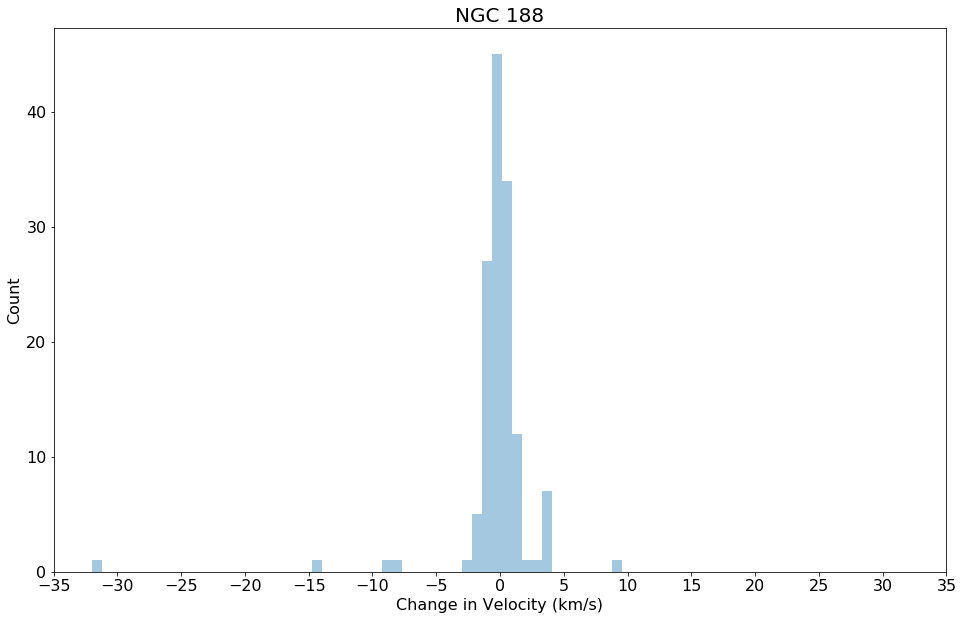

In [5826]:
plt.figure(figsize=(16,10))
sns.distplot(vdf.deltav,bins=100,kde=False)
#plt.xlim(-10,10)
plt.xlabel('Change in Velocity (km/s)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xlim(-35,35)
plt.xticks([-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35],fontsize=16)
plt.yticks(fontsize=16)
plt.title('NGC 188',fontsize=20)
plt.show()

In [5507]:
allmatch.copy()
allmatch = allmatch.loc[(allmatch['deltav'].astype('float') > -5) & (allmatch['deltav'].astype('float') < 5)]

In [5508]:
allmatch['masskg'] = allmatch.mass * 1.999e30 #solar mass to kg
allmatch['deltaV'] = allmatch.deltav * 1e3 # km/s to m/s
#allmatch['Vr ms'] = allmatch.Vr * 10e3

In [5509]:
cgy = np.sum(allmatch['_DEJ2000']*allmatch['masskg'])/np.sum(allmatch['masskg'])
cgx = np.sum(allmatch['_RAJ2000']*allmatch['masskg'])/np.sum(allmatch['masskg'])
cgz = np.sum(((allmatch['_RAJ2000']+allmatch['_DEJ2000'])/2)*allmatch['masskg'])/np.sum(allmatch['masskg'])

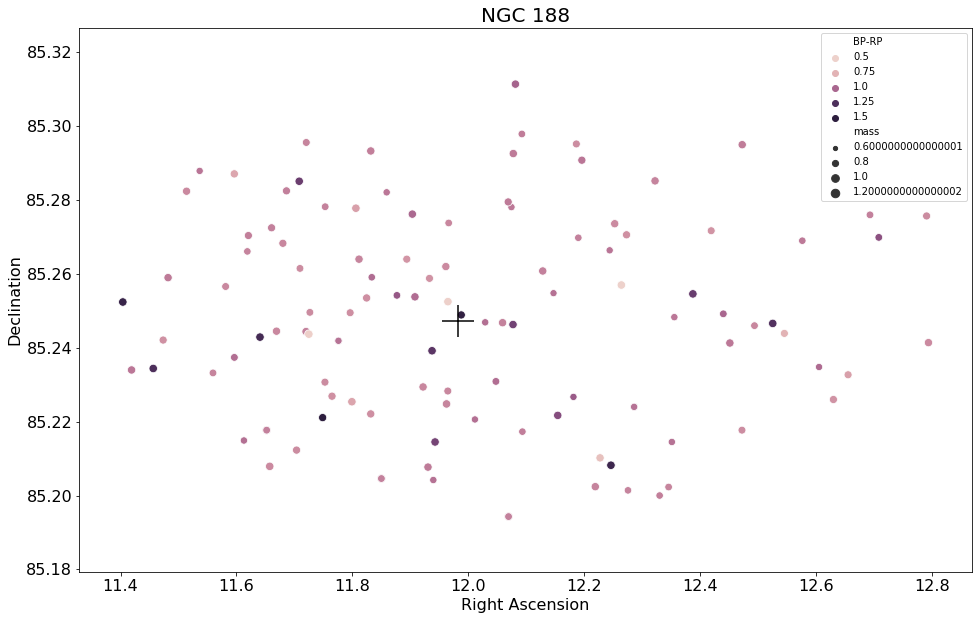

In [5834]:
plt.figure(figsize=(16,10))
g = sns.scatterplot(x='_RAJ2000',y='_DEJ2000',size='mass',hue=allmatch['BP-RP'].astype('float'),
                legend='brief',data=allmatch)
#plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
plt.scatter(cgx, cgy, color='k', marker='+', s=1e3);
plt.xlabel('Right Ascension',fontsize=16)
plt.ylabel('Declination',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('NGC 188',fontsize=20)
plt.show()

In [5511]:
com = allmatch[['_RAJ2000','_DEJ2000']]
com = com.copy()
com['mass'] = allmatch['mass']
com['z'] = (allmatch['_RAJ2000'] + allmatch['_DEJ2000'])/2

In [5512]:
# import plotly.express as px

# fig = px.scatter_3d(com, x='_RAJ2000', y='_DEJ2000', z='z',color='mass')
# fig.show()

In [5513]:
p=[]
s = []
for i in allmatch._RAJ2000.tolist():
    rx = np.abs(cgx - i)
    rxlist = p.append(rx)
for j in allmatch._DEJ2000.tolist():
    ry = np.abs(cgy - j)
    rylist = s.append(ry)   
for k in allmatch._RAJ2000.tolist():
    rz = np.abs(cgz - k)
    rzlist = s.append(rz)

In [5514]:
rx = pd.DataFrame(p,columns=['rx'])
ry = pd.DataFrame(s,columns=['ry'])
rz = pd.DataFrame(s,columns=['rz'])
rdf = pd.concat([rx,ry,rz],axis=1)
rdf['dist'] = np.sqrt(rdf['rx']**2 + rdf['ry']**2 + rdf['rz']**2)

In [5515]:
# consider z = x+y/2

In [5516]:
rdf['arclength'] = np.radians((rdf.dist))*(1585*3.086e16) #arc length?? convert rdf to radians. 
# Using distance computed from Gaia analysis

In [5848]:
rdf.arclength.max()

6.924694977181382e+17

In [5849]:
M

2.68335765e+32

In [5517]:
#allmatch['vt'] = np.sqrt(allmatch['Vr ms']**2) #rms

In [5518]:
allmatch['K'] = 0.5*allmatch['masskg']*(np.sqrt(3)*allmatch.deltaV**2)

In [5519]:
G = 6.67e-11

In [5520]:
M = allmatch.masskg.sum()

In [5841]:
rhs = G*(M*(2760*1.99e30))/((rdf.arclength.max()))
# total U of those stars has to come from teh total GPE of the whole thing
# estimate error analysis

In [5842]:
rhs

1.4195997216944463e+38

In [5843]:
lhsSum = allmatch.K.sum()
rhsSum = rhs.sum()

In [5844]:
lhsSum

3.456852480919177e+38

In [5845]:
rhs

1.4195997216944463e+38

In [5846]:
lhsSum/rhs

2.435089573554613

In [5506]:
# find average velocity and the rms of the delta v

In [5610]:
photdf = pd.read_csv('//Users/Isaac/Astrophysics Techniques/ngc188pdump2.txt',sep='\s+')
photdf

,starID,x,y,mag,mag_e,RA,DEC
0,40,86.978,731.207,12.815,0.004,0:45:26.0250,85:16:54.150
1,41,86.999,734.541,12.815,0.004,0:45:26.0501,85:16:54.175
2,42,87.013,741.636,12.851,0.004,0:45:26.0750,85:16:54.199
3,212,909.206,3157.425,13.411,0.005,0:45:47.1468,85:16:33.467
4,214,909.346,3164.527,13.411,0.005,0:45:47.1981,85:16:33.514
...,...,...,...,...,...,...,...
261,200,2582.057,3012.472,26.812,6.024,0:46:21.0381,85:15:42.129
262,119,3655.736,2013.290,27.107,6.915,0:46:40.8609,85:15:07.304
263,160,2764.701,2407.187,27.810,10.922,0:46:23.7732,85:15:35.540
264,261,3289.168,3825.200,28.111,15.896,0:46:36.9404,85:15:22.048


In [5611]:
xpix = np.array(photdf.x)
ypix = np.array(photdf.y)

In [5612]:
import astropy.io.fits as fits
import astropy.wcs as wcs
import numpy as np
import os

filename = os.path.join(wcs.__path__[0], '/Users/Isaac/Astrophysics Techniques/ngc188drz.fits')
hdulist = fits.open(filename)
w = wcs.WCS(hdulist[('sci',1)].header, hdulist)
hdulist.close()
ra, dec = w.all_pix2world(xpix,ypix, 1)

In [5613]:
RA = pd.DataFrame(ra.tolist()).rename({0:'ra'},axis=1)
DEC = pd.DataFrame(dec.tolist()).rename({0:'dec'},axis=1)

In [5614]:
photdf['RAfix'] = RA
photdf['DECfix'] = DEC

In [5624]:
photdf

,starID,x,y,mag,mag_e,RA,DEC,RAfix,DECfix,dec,ra
0,40,86.978,731.207,12.815,0.004,0:45:26.0250,85:16:54.150,11.418386,85.276590,85.281708,11.358438
1,41,86.999,734.541,12.815,0.004,0:45:26.0501,85:16:54.175,11.418673,85.276562,85.281715,11.358542
2,42,87.013,741.636,12.851,0.004,0:45:26.0750,85:16:54.199,11.419281,85.276502,85.281722,11.358646
3,212,909.206,3157.425,13.411,0.005,0:45:47.1468,85:16:33.467,11.709314,85.261786,85.275963,11.446445
4,214,909.346,3164.527,13.411,0.005,0:45:47.1981,85:16:33.514,11.709930,85.261727,85.275976,11.446659
...,...,...,...,...,...,...,...,...,...,...,...
261,200,2582.057,3012.472,26.812,6.024,0:46:21.0381,85:15:42.129,11.869555,85.274700,85.261702,11.587659
262,119,3655.736,2013.290,27.107,6.915,0:46:40.8609,85:15:07.304,11.896096,85.290694,85.252029,11.670254
263,160,2764.701,2407.187,27.810,10.922,0:46:23.7732,85:15:35.540,11.837175,85.281127,85.259872,11.599055
264,261,3289.168,3825.200,28.111,15.896,0:46:36.9404,85:15:22.048,12.011370,85.272693,85.256124,11.653918


In [4980]:
#target RA DEC
#1.176845679867E+01
#8.527572050076E+01 

In [5621]:
photdf['dec'] = photdf.DEC.apply(lambda x: int(x.split(":")[0]) + 
int(x.split(":")[1])/60 + float(x.split(":")[2])/3600 if type(x) is str else x)

In [5622]:
photdf['ra'] = photdf.RA.apply(lambda x: int(x.split(":")[0]) + 
int(x.split(":")[1])*0.25 + float(x.split(":")[2])*(15/3600) if type(x) is str else x)

In [5731]:
rasub2 = photdf.RAfix.astype('float').apply(lambda x : (x - stars._RAJ2000.astype('float'))*np.cos(np.radians(stars._DEJ2000.astype('float'))))
decsub2 = photdf.DECfix.astype('float').apply(lambda x : np.abs((x - stars._DEJ2000)))
rval2 = np.sqrt(np.abs((rasub2)**2 + (decsub2)**2))

In [5732]:
# get length of df's columns
num_cols = len(list(rval2))

# generate range of ints for suffixes
# with length exactly half that of num_cols;
# if num_cols is even, truncate concatenated list later
# to get to original list length
#rng = range(1, int((len(list(rval))-1)/2)+1)
rng = range(1, int((num_cols) + 1))

new_cols = ['star_' + str(i) for i in rng]

# ensure the length of the new columns list is equal to the length of df's columns
rval2.columns = new_cols[:num_cols]
# rename coloumns to star #s

In [5733]:
rval2.reset_index()

,index,star_1,star_2,star_3,star_4,star_5,star_6,star_7,star_8,star_9,star_10,star_11,star_12,star_13,star_14,star_15,star_16,star_17,star_18,star_19,star_20,star_21,star_22,star_23,star_24,star_25,star_26,star_27,star_28,star_29,star_30,star_31,star_32,star_33,star_34,star_35,star_36,star_37,star_38,star_39,star_40,star_41,star_42,star_43,star_44,star_45,star_46,star_47,star_48,star_49,star_50,star_51,star_52,star_53,star_54,star_55,star_56,star_57,star_58,star_59,star_60,star_61,star_62,star_63,star_64,star_65,star_66,star_67,star_68,star_69,star_70,star_71,star_72,star_73,star_74,star_75,star_76,star_77,star_78,star_79,star_80,star_81,star_82,star_83,star_84,star_85,star_86,star_87,star_88,star_89,star_90,star_91,star_92,star_93,star_94,star_95,star_96,star_97,star_98,star_99,star_100,star_101,star_102,star_103,star_104,star_105,star_106,star_107,star_108,star_109,star_110,star_111,star_112,star_113,star_114,star_115,star_116,star_117,star_118,star_119,star_120,star_121,star_122,star_123,star_124,star_125,star_126,star_127,star_128,star_129,star_130,star_131,star_132,star_133,star_134,star_135,star_136,star_137,star_138,star_139,star_140,star_141,star_142,star_143,star_144,star_145,star_146,star_147,star_148,star_149,star_150,star_151,star_152,star_153,star_154,star_155,star_156,star_157,star_158,star_159,star_160,star_161,star_162,star_163,star_164,star_165,star_166,star_167,star_168,star_169,star_170,star_171,star_172,star_173,star_174,star_175,star_176,star_177,star_178,star_179,star_180,star_181,star_182,star_183,star_184,star_185,star_186,star_187,star_188,star_189,star_190,star_191,star_192,star_193,star_194,star_195,star_196,star_197,star_198,star_199,star_200,star_201,star_202,star_203,star_204,star_205,star_206,star_207,star_208,star_209,star_210,star_211,star_212,star_213,star_214,star_215,star_216,star_217,star_218,star_219,star_220,star_221,star_222,star_223,star_224,star_225,star_226,star_227,star_228,star_229,star_230,star_231,star_232,star_233,star_234,star_235,star_236,star_237,star_238,star_239,star_240,star_241,star_242,star_243,star_244,star_245,star_246,star_247,star_248,star_249,star_250,star_251,star_252,star_253,star_254,star_255,star_256,star_257,star_258,star_259,star_260,star_261,star_262,star_263,star_264,star_265,star_266,star_267,star_268,star_269,star_270,star_271,star_272,star_273,star_274,star_275,star_276,star_277,star_278,star_279,star_280,star_281,star_282,star_283,star_284,star_285,star_286,star_287,star_288,star_289,star_290,star_291,star_292,star_293,star_294,star_295,star_296,star_297,star_298,star_299,star_300,star_301,star_302,star_303,star_304,star_305,star_306,star_307,star_308,star_309,star_310,star_311,star_312,star_313,star_314,star_315,star_316,star_317,star_318,star_319,star_320,star_321,star_322,star_323,star_324,star_325,star_326,star_327,star_328,star_329,star_330,star_331,star_332,star_333,star_334,star_335,star_336,star_337,star_338,star_339,star_340,star_341,star_342,star_343,star_344,star_345,star_346,star_347,star_348,star_349,star_350,star_351,star_352,star_353,star_354,star_355,star_356,star_357,star_358,star_359,star_360,star_361
0,0,0.060446,0.059370,0.064100,0.061026,0.060758,0.056569,0.065650,0.059776,0.067988,0.062437,0.060886,0.056911,0.056219,0.058679,0.067756,0.054698,0.066139,0.051247,0.052694,0.067257,0.070367,0.072629,0.073105,0.070486,0.047158,0.047158,0.068811,0.068811,0.046989,0.060753,0.056507,0.046114,0.045760,0.076322,0.068890,0.073892,0.063983,0.076280,0.046482,0.077231,0.054305,0.077989,0.077480,0.042121,0.044050,0.075465,0.075465,0.057046,0.057046,0.041230,0.070725,0.081745,0.081949,0.075147,0.052103,0.050171,0.067824,0.082631,0.082979,0.040937,0.045223,0.038490,0.038490,0.038490,0.038490,0.038490,0.074507,0.074507,0.074507,0.074507,0.074507,0.028653,0.028653,0.028653,0.028653,0.028653,0.042989,0.042989,0.042989,0.042989,0.042989,0.042172,0.042172,0.042172,0.042172,0.042172,0.083142,0.038510,0.082262,0.083177,0.054032,0.044628,0.053854,0.040780,0.

In [5734]:
photlist = []
for index in rval2.iterrows():
    photlist.append((index[0],index[1].min()))

In [5739]:
t=[]

for i in photlist:
    if i[1] <= 3/3600:
        t.append(i)    

phot = pd.DataFrame(t)
phot = phot.rename({0:'photIndex',1:'min val'},axis=1)

In [5740]:
phot

,photIndex,min val
0,3,0.000287
1,4,0.000228
2,5,0.000816
3,7,0.000781
4,8,0.000580
...,...,...
74,191,0.000692
75,193,0.000724
76,195,0.000711
77,203,0.000813


In [5741]:
#test2.to_csv(sep=' ', index=False, header=False)

In [5742]:
indexlist2 = rval2.idxmin().tolist()

In [5743]:
# Yields a tuple of column name and series for each column in the dataframe
z2 = []
for (columnName, columnData) in rval2.iteritems():
    z2.append((columnData.values.min()))
minval2 = pd.DataFrame(z2,columns=['min val'])

In [5744]:
minval2 = minval2.reset_index()

In [5745]:
minval2 = minval2.rename(columns={'index':'GaiaStarID'})

In [5746]:
indices2 = pd.DataFrame(indexlist2)

In [5747]:
indices2 = indices2.rename(columns={0:'PhotstarIndex'})

In [5748]:
photmatch = phot.merge(minval2,on='min val')

In [5749]:
minstar2 = pd.concat([phot,minval2],axis=1)

In [5750]:
#mincut2 = minstar2[minstar2['min val'] <= 10/3600]

In [5751]:
photmatch

,photIndex,min val,GaiaStarID
0,4,0.000228,150
1,5,0.000816,153
2,7,0.000781,287
3,8,0.000580,71
4,8,0.000580,72
...,...,...,...
56,176,0.000763,269
57,182,0.000447,170
58,191,0.000692,265
59,195,0.000711,327


In [5752]:
gaiaphotmatch = photmatch.merge(stars,left_on='GaiaStarID',right_on='index')

In [5753]:
photdf = photdf.reset_index()

In [5754]:
photdf

,level_0,index,starID,x,y,mag,mag_e,RA,DEC,RAfix,DECfix,dec,ra
0,0,0,40,86.978,731.207,12.815,0.004,0:45:26.0250,85:16:54.150,11.418386,85.276590,85.281708,11.358438
1,1,1,41,86.999,734.541,12.815,0.004,0:45:26.0501,85:16:54.175,11.418673,85.276562,85.281715,11.358542
2,2,2,42,87.013,741.636,12.851,0.004,0:45:26.0750,85:16:54.199,11.419281,85.276502,85.281722,11.358646
3,3,3,212,909.206,3157.425,13.411,0.005,0:45:47.1468,85:16:33.467,11.709314,85.261786,85.275963,11.446445
4,4,4,214,909.346,3164.527,13.411,0.005,0:45:47.1981,85:16:33.514,11.709930,85.261727,85.275976,11.446659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,261,200,2582.057,3012.472,26.812,6.024,0:46:21.0381,85:15:42.129,11.869555,85.274700,85.261702,11.587659
262,262,262,119,3655.736,2013.290,27.107,6.915,0:46:40.8609,85:15:07.304,11.896096,85.290694,85.252029,11.670254
263,263,263,160,2764.701,2407.187,27.810,10.922,0:46:23.7732,85:15:35.540,11.837175,85.281127,85.259872,11.599055
264,264,264,261,3289.168,3825.200,28.111,15.896,0:46:36.9404,85:15:22.048,12.011370,85.272693,85.256124,11.653918


In [5755]:
photmatch

,photIndex,min val,GaiaStarID
0,4,0.000228,150
1,5,0.000816,153
2,7,0.000781,287
3,8,0.000580,71
4,8,0.000580,72
...,...,...,...
56,176,0.000763,269
57,182,0.000447,170
58,191,0.000692,265
59,195,0.000711,327


In [5756]:
photmatch2 = photmatch.merge(photdf,left_on='GaiaStarID',right_on='starID')

In [5757]:
#photmatch = mincut2.merge(photdf,left_on='PhotstarIndex',right_on='index')

In [5758]:
photmatch2

,photIndex,min val,GaiaStarID,level_0,index,starID,x,y,mag,mag_e,RA,DEC,RAfix,DECfix,dec,ra
0,4,0.000228,150,28,28,150,2045.157,2232.514,18.115,0.046,0:46:08.8588,85:15:57.251,11.747976,85.277589,85.265903,11.536912
1,5,0.000816,153,92,92,153,2478.041,2270.894,22.645,0.375,0:46:17.7710,85:15:44.102,11.795964,85.280287,85.262251,11.574046
2,8,0.000580,71,74,74,71,2951.162,1271.831,21.731,0.245,0:46:25.3714,85:15:27.606,11.760022,85.292089,85.257668,11.605714
3,8,0.000580,72,120,120,72,3454.418,1282.868,23.443,0.568,0:46:35.6291,85:15:12.253,11.813138,85.295509,85.253404,11.648455
4,8,0.000580,73,205,205,73,3128.962,1286.384,24.515,1.028,0:46:29.0382,85:15:22.225,11.779686,85.293207,85.256174,11.620992
5,8,0.000580,74,160,160,74,897.025,1310.393,23.994,0.765,0:45:43.4925,85:16:30.345,11.551144,85.277377,85.275096,11.431219
6,8,0.000580,75,62,62,75,2122.753,1327.099,20.828,0.160,0:46:08.5871,85:15:52.999,11.679010,85.285826,85.264722,11.535780
7,9,0.000746,224,210,210,224,1119.077,3292.295,24.621,1.075,0:45:51.7555,85:16:27.355,11.742325,85.262107,85.274265,11.465648
8,10,0.000779,103,126,126,103,2283.650,1644.533,23.553,0.591,0:46:12.5662,85:15:48.787,11.722656,85.284255,85.263552,11.552359
9,15,0.000749,182,209,209,182,1813.530,2649.986,24.589,1.013,0:46:04.9030,85:16:05.148,11.759483,85.272421,85.268097,11.520429


In [5759]:
photmatch2.columns

Index(['photIndex', 'min val', 'GaiaStarID', 'level_0', 'index', 'starID', 'x',
       'y', 'mag', 'mag_e', 'RA', 'DEC', 'RAfix', 'DECfix', 'dec', 'ra'],
      dtype='object')

In [5760]:
gaiaphotmatch.columns

Index(['photIndex', 'min val', 'GaiaStarID', 'level_0', 'index', '_r',
       '_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS',
       'Source', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup',
       'FG', 'e_FG', 'Gmag_x', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag',
       'FRP', 'e_FRP', 'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG',
       'E(BP-RP)', 'Rad', 'Lum', 'bool', 'Gmag_y', 'point', 'closest', 'mass'],
      dtype='object')

In [5761]:
allmatchphot = photmatch2.merge(gaiaphotmatch,left_on='starID',right_on='GaiaStarID')

In [5762]:
#phot2 = photmatch2.merge(gaiaphotmatch,left_on='starID',right_on='starID')

In [5763]:
allmatchphot.columns

Index(['photIndex_x', 'min val_x', 'GaiaStarID_x', 'level_0_x', 'index_x',
       'starID', 'x', 'y', 'mag', 'mag_e', 'RA', 'DEC', 'RAfix', 'DECfix',
       'dec', 'ra', 'photIndex_y', 'min val_y', 'GaiaStarID_y', 'level_0_y',
       'index_y', '_r', '_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS',
       'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA',
       'pmDE', 'e_pmDE', 'Dup', 'FG', 'e_FG', 'Gmag_x', 'e_Gmag', 'FBP',
       'e_FBP', 'BPmag', 'e_BPmag', 'FRP', 'e_FRP', 'RPmag', 'e_RPmag',
       'BP-RP', 'RV', 'e_RV', 'Teff', 'AG', 'E(BP-RP)', 'Rad', 'Lum', 'bool',
       'Gmag_y', 'point', 'closest', 'mass'],
      dtype='object')

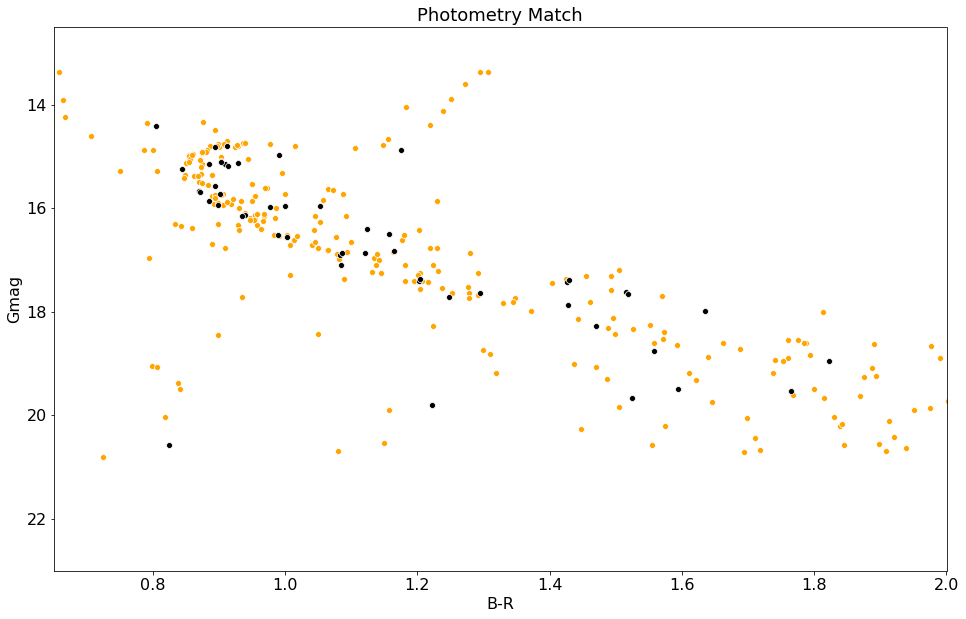

In [5802]:
fig = plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

sns.scatterplot(x=df2['BP-RP'].astype('float'),y=df2['Gmag'].astype('float'),color='orange')
sns.scatterplot(x=allmatchphot['BP-RP'].astype('float'),
                y=allmatchphot['Gmag_x'].astype('float'),color='black')

# plt.plot(iso2['B-Rf'],iso2['G_final45'],color='green', label='4.5 Gyr')
# plt.plot(iso3['B-Rf'],iso3['G_final5'],color='purple', label='5 Gyr')
# plt.plot(iso4['B-Rf'],iso4['G_final6'],color='orange', label='6 Gyr')
# plt.plot(iso5['B-Rf'],iso5['G_final7'],color='red', label='7 Gyr')
# plt.plot(iso6['B-Rf'],iso6['G_final8'],color='grey', label='8 Gyr')

#plt.legend()
plt.xlim(0.65, 2)
plt.ylim(23, 12.5)
plt.xlabel('B-R',fontsize=16)
plt.ylabel('Gmag',fontsize=16)
plt.title('Photometry Match',fontsize=18)


plt.show()
fig.savefig("ngc188photmatch.jpg",dpi=1000)

In [5766]:
allmatchphot['magadj'] = allmatchphot.mag - 2.012

In [5782]:
allmatchphot.mag - 2.012

0     16.103
1     20.633
2     19.719
3     21.431
4     22.503
5     21.982
6     18.816
7     22.609
8     21.541
9     22.577
10    23.865
11    15.528
12    15.063
13    18.352
14    22.976
15    21.068
16    21.009
17    21.535
18    21.854
19    21.548
20    24.786
21    19.784
22    15.808
23    22.431
24    21.450
25    22.721
26    22.199
27    22.865
28    22.414
29    21.690
30    22.191
31    11.399
32    25.095
33    17.638
34    16.664
35    19.849
36    16.216
37    21.042
38    17.625
39    23.943
40    21.909
41    19.566
42    15.509
43    22.451
44    22.044
45    22.914
46    22.300
47    16.605
48    20.224
49    22.241
50    23.985
51    14.644
52    15.542
53    22.154
Name: mag, dtype: float64